## Demo of Cluster pictures in SageMath

Reload the module whenever it changes for easy development:

In [1]:
%reload_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from sage_cluster_pictures import *
set_verbose(0)
latex.extra_preamble('')
latex.add_to_preamble(r"\usepackage{tkz-graph,semtkzX}") # https://trac.sagemath.org/ticket/19515
latex.add_to_mathjax_avoid_list("clusterpicture")
sage.misc.latex.EMBEDDED_MODE = True

Example 1.2 of DMDM

In [80]:
p = 101
x = polygen(Qp(p, 100))
H = HyperellipticCurve(x*(x^16-1)*(x^16+(p+2)*x^8+1))
C = Cluster.from_curve(H)
C


(● ● ● ● ● ● ● ● ● (● ● ●)_1/2 (● ● ●)_1/2 (● ● ●)_1/2 (● ● ●)_1/2 (● ● ●)_1/2 (● ● ●)_1/2 (● ● ●)_1/2 (● ● ●)_1/2)_0

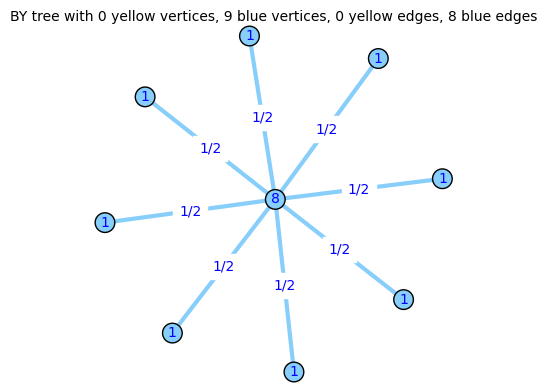

In [81]:
C.BY_tree()

In [67]:
C.potential_toric_rank()

0

We can display the cluster as ASCII art and unicode art

In [68]:
%display ascii_art
C

(* * * * * (* * *)_1/2 (* * *)_1/2 (* * *)_1/2 (* * *)_1/2)_0

In [71]:
%display unicode_art

In [72]:
C

(● ● ● ● ● (● ● ●)_1/2 (● ● ●)_1/2 (● ● ●)_1/2 (● ● ●)_1/2)_0

Finally we should be able to display the nice Tikz graphs, this required a teeny bit of hacking sage.
https://trac.sagemath.org/ticket/19515

In [6]:
view(C)

Error: PDFLaTeX does not seem to be installed.  Download it from
ctan.org and try again.
Latex error
<html><img src="cell:///Users/donepudi/.sage/temp/ravis-mbp.lan/62021/tmp_8ah1k3ud.png"></html>


In [7]:
latex(C)

\tikzset{every picture/.append style={scale=1.9}} \def\cdepthscale{0.5}   \clusterpicture\Root[A] {2} {first} {mc1c1};
\Root[A] {2} {mc1c1} {mc1c2};
\Root[A] {2} {mc1c2} {mc1c3};
\ClusterLD mc1[][{2}] = (mc1c1)(mc1c2)(mc1c3);
\Root[A] {2} {mc1} {mc2c1};
\Root[A] {2} {mc2c1} {mc2c2c1};
\Root[A] {2} {mc2c2c1} {mc2c2c2};
\Root[A] {2} {mc2c2c2} {mc2c2c3};
\ClusterLD mc2c2[][{2}] = (mc2c2c1)(mc2c2c2)(mc2c2c3);
\ClusterLD mc2[][{1}] = (mc2c1)(mc2c2);
\ClusterLD m[][{0}] = (mc1)(mc2);
\endclusterpicture

Let's test some basic functionality.

In [8]:
C.is_even()

False

In [9]:
C.is_odd()

True

In [8]:
K = Qp(5)
C = Cluster.from_roots([K(1), K(6), K(5), K(10)])
C.is_ubereven()

True

In [9]:
C

((● ●)_1 (● ●)_1)_0

In [10]:
%display plain
list(C.all_descendants())

[Cluster with 4 roots and 2 children,
 Cluster with 2 roots and 2 children,
 Cluster with 1 roots and 0 children,
 Cluster with 1 roots and 0 children,
 Cluster with 2 roots and 2 children,
 Cluster with 1 roots and 0 children,
 Cluster with 1 roots and 0 children]

In [11]:
C.children()[0].children()[0].is_proper()

False

In [12]:
C.children()[0].parent_cluster()

Cluster with 4 roots and 2 children

Finally we can make this last example again from just root valuation data, a matrix of valuations of differences. This way we don't pick a prime $p$.

In [13]:
C = Cluster(Matrix(ZZ, 4, 4,[
                   [20, 1, 0, 0 ],
                   [1, 20, 0, 0 ],
                   [0, 0, 20, 1 ],
                   [0, 0, 1, 20 ],
                ]))
C.is_ubereven()

True

In [17]:
print(unicode_art(C))

((● ●)_1 (● ●)_1)_0


Let's see if it can handle Raymond's example from the draft:

In [18]:
K = Qp(3)
x = polygen(K)
H = HyperellipticCurve(x*(x - 3)*(x - 4)*(x - 13)*(x + 1)*(x + 5))
C = Cluster.from_curve(H)
C

Cluster with 6 roots and 3 children

In [19]:
%display unicode_art
C

(● (● ●)_1 (● ● ●)_2)_0

so far so good!

In [20]:
C = Cluster.from_roots([K(1), K(5), K(10)])
C.children()[0].is_twin()

False

In [21]:
K = Qp(5)
C = Cluster.from_roots([K(1), K(5), K(10)])
C.is_top_cluster()

True

In [22]:
C.children()[0].is_top_cluster()

False

In [23]:
C.relative_depth()

0

In [24]:
C.children()[1].relative_depth()

1

In [25]:
C2 = Cluster.from_roots([K(5), K(25), K(50)])
C2.depth()

1

Example 3.5 in the users guide

In [31]:
K = Qp(7,150)
x = polygen(K)
H = HyperellipticCurve((x^2+7^2)*(x^2-7^(15))*(x-7^6)*(x-7^6-7^9))
R = Cluster.from_curve(H)
R

(● ● ((● ●)_3/2 (● ●)_3)_5)_1

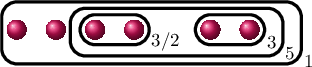

In [32]:
view(R)

In [33]:
unicode_art(R)

(● ● ((● ●)_3/2 (● ●)_3)_5)_1

In [34]:
R.depth()

1

In [42]:
%display plain
a = R.children()[2]
a.depth()

6

In [43]:
a.relative_depth()

5

In [44]:
t1 = a.children()[0]
t1.depth()

15/2

In [45]:
t2 = a.children()[1]
t2.depth()

9

In [46]:
a.is_ubereven()

True

In [47]:
t1.is_twin()

True

In [48]:
t2.is_twin()

True

In [49]:
R.is_cotwin()

True

In [50]:
a.is_cotwin()

False

In [51]:
t1.is_cotwin()

False

In [53]:
[c for c in R.all_descendants() if c.is_principal()]

[Cluster with 4 roots and 2 children]

In [54]:
a.is_principal()

True

In [55]:
t1.meet(t2)

Cluster with 4 roots and 2 children

In [56]:
t1.meet(t2) == a

True

In [57]:
t2.meet(t1)

Cluster with 4 roots and 2 children

In [58]:
t2.star()

Cluster with 4 roots and 2 children

In [59]:
a.star()

Cluster with 4 roots and 2 children

A top cotwin

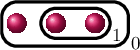

In [61]:
K = Qp(5)
C = Cluster.from_roots([K(1), K(5), K(10)])
view(C)

In [62]:
C.is_cotwin()

True

In [63]:
C.children()[1]

Cluster with 2 roots and 2 children

In [64]:
C.children()[1].is_cotwin()

False

In [65]:
C.star()

Cluster with 2 roots and 2 children

A non-top cotwin

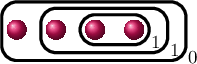

In [66]:
C = Cluster.from_roots([K(1), K(5), K(10), K(35)])
view(C)

In [67]:
C.is_cotwin()

False

In [68]:
C.children()[0].is_cotwin()

False

In [69]:
C.children()[1].is_cotwin()

True

In [70]:
C.children()[1].star()

Cluster with 2 roots and 2 children

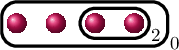

In [71]:
C = Cluster.from_roots([K(1), K(2), K(10), K(35)])
view(C)

In [72]:
C.is_cotwin()

True

In [73]:
C.children()[0].is_cotwin()

False

In [74]:
C.children()[1].is_cotwin()

False

In [75]:
C.star()

Cluster with 2 roots and 2 children

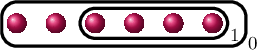

In [76]:
K = Qp(5)
x = polygen(K)
H = HyperellipticCurve((x^4-5^4)*(x+1)*(x+2))
C = Cluster.from_curve(H)
view(C)

Making clusters from pictures

In [80]:
Cluster.from_picture(ascii_art(C))

Cluster with 6 roots and 3 children

In [90]:
%display unicode_art
C

(● (● (● ● (● ●)_1)_1)_1)_0

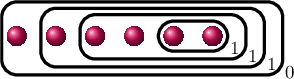

In [91]:
view(C)

In [92]:
p = 3
set_verbose(0)
K =Qp(p)
C = Cluster.from_roots([K(1), K(p), K(2*p), K(2*p + p^2), K(2*p + 2*p^2), K(2*p + 2*p^2+p^3)])
C.children()[1]

(● (● ● (● ●)_1)_1)_1

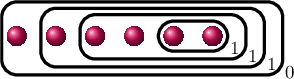

In [93]:
view(C)

In [94]:
latex(C)

 \def\cdepthscale{0.5}   \clusterpicture\Root[A] {2} {first} {mc1};
\Root[A] {2} {mc1} {mc2c1};
\Root[A] {2} {mc2c1} {mc2c2c1};
\Root[A] {2} {mc2c2c1} {mc2c2c2};
\Root[A] {2} {mc2c2c2} {mc2c2c3c1};
\Root[A] {2} {mc2c2c3c1} {mc2c2c3c2};
\ClusterLD mc2c2c3[][1] = (mc2c2c3c1)(mc2c2c3c2);
\ClusterLD mc2c2[][1] = (mc2c2c1)(mc2c2c2)(mc2c2c3);
\ClusterLD mc2[][1] = (mc2c1)(mc2c2);
\ClusterLD m[][0] = (mc1)(mc2);
\endclusterpicture

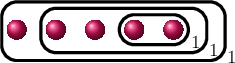

In [97]:
view(C.children()[1])

In [99]:
for A in C.all_descendants():
    if A.is_principal():
        print(A)

Cluster with 4 roots and 3 children


In [100]:
C.children()[1].is_cotwin()

True

In [101]:
C.is_principal()

False

In [109]:
T = C.BY_tree()

In [110]:
C.potential_toric_rank()

2

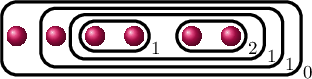

In [111]:
p=3
K = Qp(p,300)
x = polygen(K)
C = Cluster.from_polynomial(x*(x-1)*(x-p)*(x-p^2)*(x-p^3-p^2)*(x-p^4))
view(C)

In [113]:
for A in C.all_descendants():
    if A.is_principal():
        print(A)

Cluster with 4 roots and 2 children


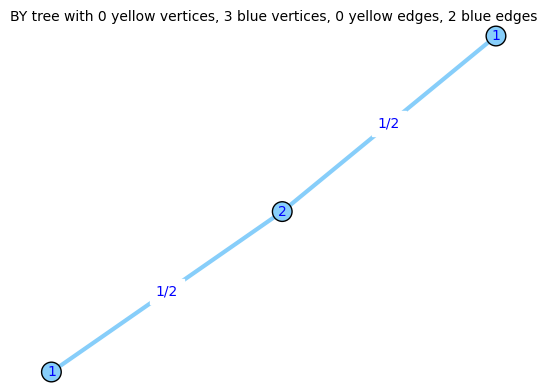

In [19]:
C.BY_tree()

In [20]:
C.potential_toric_rank()

0

In [21]:
C.is_principal()

True

In [117]:
K = Qp(5)

In [118]:
C = Cluster.from_roots([K(1), K(5), K(10)])
C.is_principal()
C.children()[0]

●

In [119]:
C = Cluster.from_roots([K(1), K(6), K(5), K(10)])

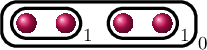

In [120]:
view(C)

In [121]:
C.is_cotwin()

False